### Cluster top-performing plant types
Based on select emergent properties, k-means clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from palettable.cartocolors.qualitative import Vivid_8

from ideotype.data_process import fetch_emps
from ideotype.analysis import (run_pca,
                               rank_top_phenos,
                               identify_rankchanged_phenos)
from ideotype.figures import plot_pca_strategies

Fetch top performing, improved, and declined plant types:

In [3]:
# parameters
n_pheno = 20
w_yield = 1
w_disp = 1
future_run = 'f2100'
rank_limit = 5

# fetch top phenos
phenos_topall = rank_top_phenos('present', n_pheno, w_yield, w_disp)
phenos_top20 = phenos_topall[:20]

# identify improved & declined phenos
(phenos_improved, phenos_declined, 
 pup_rc, pdown_rc) = identify_rankchanged_phenos(
    n_pheno, w_yield, w_disp, future_run, rank_limit)

Fetch and standardize select emergent properties as clustering features:

In [4]:
# fetch emps
df_emps, df_emps_std = fetch_emps('present')
df_emps_sub = df_emps[df_emps.cvar.isin(phenos_topall)][['cvar', 'pheno_days', 'jday', 'LA']]

# standardize df_emps
df_emps_sub_std = StandardScaler().fit_transform(df_emps_sub.iloc[:,1:])

k-means cluster plant types into differnet strategy groups:

In [4]:
# k-means cluster top-performing phenotypes
n_clusters = 8
kmeans_mod = KMeans(n_clusters=n_clusters)
kmeans_mod.fit(df_emps_sub_std)
y_kmeans = kmeans_mod.predict(df_emps_sub_std)
df_emps_sub['group'] = y_kmeans

# save cluster output
#df_emps_sub.to_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/'
#                   'strategies_cluster/phenos_strategies_cluster.csv', index=False)

Run PCA on clustered output for visualization purposes:

In [ ]:
#pca, df_pca = run_pca(df_emps_sub.iloc[:,1:-1], 3)

Visualize clustered output:

In [5]:
# read in clustered data
df_clusters = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/'
                          'strategies_cluster/phenos_strategies_phenomorph_cluster_8.csv')

# run pca
pca, df_pca = run_pca(df_clusters.iloc[:,1:-1], 3)

# manually assign strategies colors
n_clusters = 8
cs_vivid8 = Vivid_8.mpl_colors
cs = [np.nan]*n_clusters
cs[int(df_clusters.query('cvar==58').group)] = cs_vivid8[0]
cs[int(df_clusters.query('cvar==4').group)] = cs_vivid8[1]
cs[int(df_clusters.query('cvar==88').group)] = cs_vivid8[2]
cs[int(df_clusters.query('cvar==89').group)] = cs_vivid8[3]
cs[int(df_clusters.query('cvar==5').group)] = cs_vivid8[4]
cs[int(df_clusters.query('cvar==15').group)] = cs_vivid8[5]
cs[int(df_clusters.query('cvar==55').group)] = cs_vivid8[6]
cs[int(df_clusters.query('cvar==24').group)] = cs_vivid8[7]

All top performers under present-day climate:

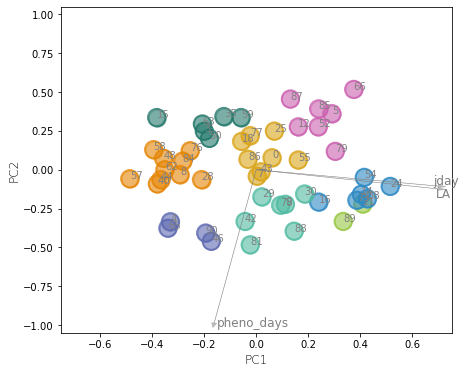

In [6]:
plot_pca_strategies(df_clusters, n_clusters, df_pca, pca, phenos_topall, cs)

Top 20 performers under present-day climate:

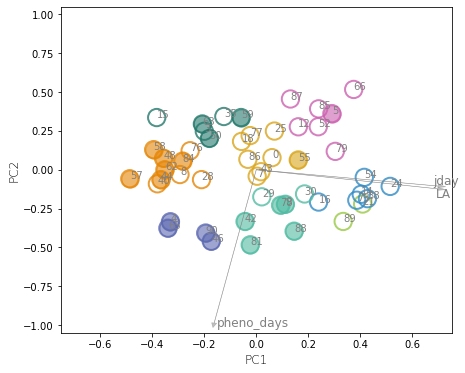

In [7]:
plot_pca_strategies(df_clusters, n_clusters, df_pca, pca, phenos_top20, cs)

Plant types with improved performance by 2100:

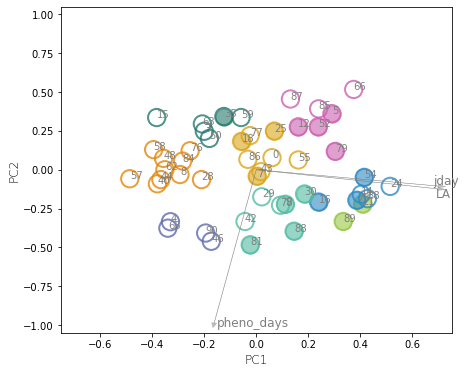

In [8]:
plot_pca_strategies(df_clusters, n_clusters, df_pca, pca, phenos_improved, cs)

Plant types with declined performance by 2100:

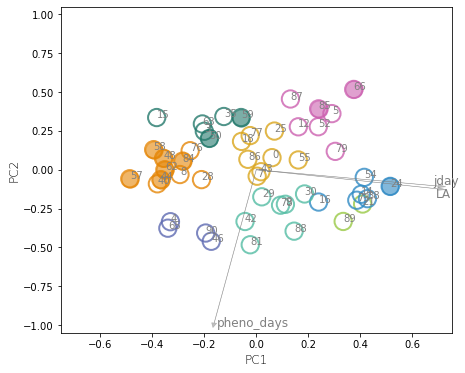

In [9]:
plot_pca_strategies(df_clusters, n_clusters, df_pca, pca, phenos_declined, cs)